<a href="https://colab.research.google.com/github/jsroa15/Digit_Recognizer/blob/main/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Packages

In [1]:
#Load packages

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns


# Load Data

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Digit Recognizer/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Digit Recognizer/test.csv')

In [3]:
#Explore the dataset

data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# General Statistics

## Datatypes

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


It's a large number of colums, but the main point is that all datatypes are the same.


## Missing Data

In [5]:
sum(data.isna().sum())

0

No missing data in the dataset

## Labels


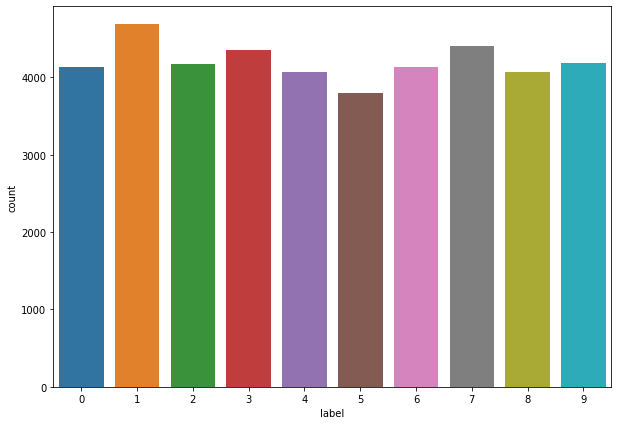

In [6]:
fig=plt.figure(figsize=(10,7))

sns.countplot(x=data.label)

plt.show()

From the above we can see that data is balanced across the labels.

# Data Preprocessing

In [7]:
#Split target Feature

y_train=data[['label']]

y_train=y_train.astype('object')

y_train=pd.get_dummies(y_train)

y_train=y_train.to_numpy()


In [8]:
#Extract Feature

X_train=data.drop('label',axis=1).to_numpy()


In [9]:
y_train

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

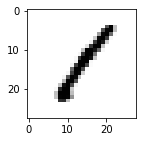

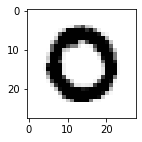

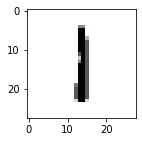

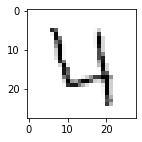

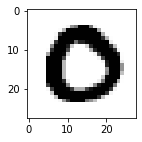

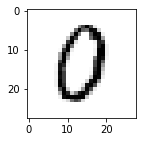

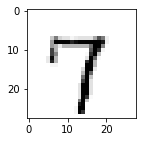

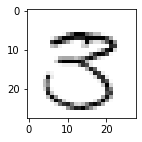

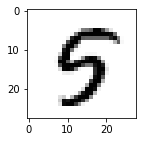

In [10]:
#Visualizing some images

for i in range(0,9):
  ax=plt.figure(figsize=(2,2))
  plt.imshow(X_train[i].reshape(28,28),cmap='Greys' )
  plt.show()
 

# Modeling

For this project we are gonna implement an Artificial Neural Network to predict the hand-writen number.

We are gonna use Sequential model to implement the Neural Network

## Initializing the Neural Network

In [11]:
#Define Sequential Model

model=keras.Sequential()

# Define the first layer
model.add(keras.layers.Dense(400,activation='relu',input_shape=(784,)))

# Add activation function to classifier
model.add(keras.layers.Dense(10, activation='softmax'))

# Finish the model compilation
model.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________


## Fit Neural Network

In [13]:
#Complete the model fit operation

model.fit(X_train, y_train, epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
263/263 [==============================] - 4s 11ms/step - loss: 21.2411 - accuracy: 0.7843 - val_loss: 2.1704 - val_accuracy: 0.9051
Epoch 2/10
263/263 [==============================] - 2s 9ms/step - loss: 1.2389 - accuracy: 0.9378 - val_loss: 1.1638 - val_accuracy: 0.9401
Epoch 3/10
263/263 [==============================] - 2s 9ms/step - loss: 0.6532 - accuracy: 0.9600 - val_loss: 1.1308 - val_accuracy: 0.9470
Epoch 4/10
263/263 [==============================] - 2s 9ms/step - loss: 0.4511 - accuracy: 0.9686 - val_loss: 1.4130 - val_accuracy: 0.9402
Epoch 5/10
263/263 [==============================] - 2s 9ms/step - loss: 0.3476 - accuracy: 0.9750 - val_loss: 1.4821 - val_accuracy: 0.9429
Epoch 6/10
263/263 [==============================] - 2s 9ms/step - loss: 0.3560 - accuracy: 0.9782 - val_loss: 1.2001 - val_accuracy: 0.9542
Epoch 7/10
263/263 [==============================] - 2s 9ms/step - loss: 0.2838 - accuracy: 0.9817 - val_loss: 1.0359 - val_accuracy: 0.9658
Epoc

# Import pictures to predict

JPEG
(370, 409)
RGB


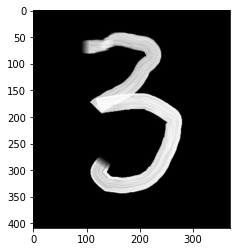

In [73]:
import PIL
from PIL import Image


# Open the image form working directory

image = Image.open('/content/drive/MyDrive/Colab Notebooks/Digit Recognizer/img33.jpg')

#Summarize some details about the image

print(image.format)
print(image.size)
print(image.mode)

#Show the image
plt.imshow(image.rotate(0))
plt.show()



In [74]:
#Convert picture to Gray Scale

new_pic=image.convert("L")


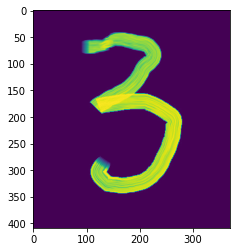

In [75]:
plt.imshow(new_pic.rotate(0))

In [76]:
#Resize the picture

new_pic=new_pic.resize((28,28))

In [77]:
#Translate picture to data

data_pic=np.asarray(new_pic)

In [78]:
data_pic

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18,  32,
         19,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  15,  33,  36, 111, 203, 213,
        203, 177, 147,  96,   9,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 110, 211, 219, 220, 139, 126,
        164, 201, 218, 225, 145,   6,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  68, 123,  82,  31,   0,   0,
          2,  24,  70, 197, 221,  48,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [42]:
#Check Shape

data_pic.shape

(28, 28)

In [79]:
data_pic=data_pic

In [80]:
nose=data_pic.reshape(1,784)

In [31]:
nose=X_train[0].reshape(28,28)


In [81]:
nose=nose.reshape(1,784)

In [82]:
#Predict

preds=model.predict(nose)

In [49]:
preds=model.predict(test)

In [83]:
preds

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [84]:
print('Predicted Number: ',np.argmax(preds,axis=1))

Predicted Number:  [3]
